             0            1           2           3           4      5  \
0   209.689000  5442.200000  158.549500  339.170000  406.230000   7.93   
1   208.238500  5693.200000  153.086500  325.032500  402.550000   8.28   
2   230.880909  5704.045455  160.493636  345.529545  429.475000   8.39   
3   230.749048  5279.547619  191.117143  361.902381  421.390476   8.30   
4   240.518421  5240.526316  232.081579  389.592105  418.918421   8.27   
5   236.998261  5247.456522  236.297826  411.132609  421.184783   9.96   
6   220.411364  5211.363636  229.144091  419.993182  406.734091  10.04   
7   230.752857  5446.547619  232.075714  416.145238  420.978571   9.70   
8   232.320435  5649.826087  233.261304  418.028261  418.304348  10.04   
9   237.942000  6083.175000  255.972000  421.615000  452.352500  10.71   
10  241.853333  6132.261905  251.417619  420.490476  448.619048  12.79   
11  259.728500  6554.175000  246.389500  451.422500  474.055000  18.24   
12  250.596842  6382.210526  228.77421

Индекс МосБиржи:
           0
0   2485.27
1   2497.10
2   2559.32
3   2665.33
4   2765.85
5   2739.50
6   2740.04
7   2747.18
8   2893.98
9   2935.37
10  3045.87
11  3076.65
12  2785.08 

Логарифмы МосБиржи:
            0
0   0.004749
1   0.024612
2   0.040586
3   0.037020
4  -0.009573
5   0.000197
6   0.002602
7   0.052058
8   0.014201
9   0.036953
10  0.010055
11 -0.099565 

Показатели портфеля
Ожидаемая доходность портфеля:  0.25777812482066276
Дисперсия портфеля (сумм. метод): 0.007489450381894967
Cтанд.отклонение (сумм. метод): 0.08654161069621345
Дисперсия портфеля (стат. метод):  0.007489450381894968
Cтанд. отклонение портфеля (стат. метод):  0.08654161069621345
Ожидаемая доходность рынка:  0.11389529272299698
Стандартное отклонение рынка:  0.13021094318647672
Безрисковая доходность rf:  0.0713
Коэффициент асимметрии As:  0.008462574975677805
Коэффициент эксцесса Ek:  -2.980304827038071

Показатели эффективности
Beta:  0.33877837057986765 
Sharpe:  2.154779918243675 
modSharpe: 

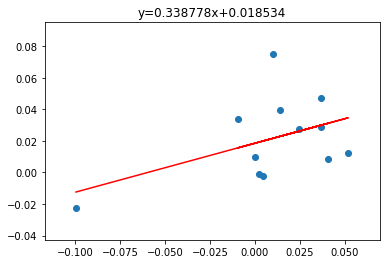

In [6]:
import xlwings as xw
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
#import openpyxl

#загрузка данных
x = xw.Book('Райф.xlsx')
port = x.sheets['Котировки'] 
head = port.range('B1:K1').value
data = port.range('B2:K14').options(pd.DataFrame, header = 0, index = False).value
port = x.sheets['Доли']
share = port.range('B2:B11').value
share = np.divide(share,100)
x.close()

#проверка данных
print(data,'\n')
print('Доли акций в портфеле\n', share,'\n')

#расчет темпов роста
m,n = 10,12
b = [[0 for j in range(m)] for i in range(n)]
a = data
for i in range(m):
    for j in range(n):
        b[j][i] = a[i][j+1]/a[i][j]
print('Темпы роста:\n', pd.DataFrame(b),'\n')
        
#расчет логарифмов
l = b
for i in range(n):
    for j in range(m):
        l[i][j] = mt.log(b[i][j])
print('Логарифмы:\n', pd.DataFrame(l),'\n')

#доходность портфеля за год
reven = []
metr = []
for i in range(n):
    s = 0
    for j in range(m):
        s += l[i][j]*share[j]
    reven.append(s) #доходность портфеля по месяцам
avg = np.mean(reven)*n #средняя доходность портфеля за год
disp = np.var(reven)*n #дисперсия портфеля за год
stddev = np.sqrt(disp) #станд отклонение портфеля за год
print('Cредняя доходность портфеля за год: ', avg)
print('Дисперсия портфеля за год: ', disp)
print('Cтандартное отклонение портфеля за год: ', stddev,'\n')

#центрированная матрица
c = np.array(l)
c = c.transpose()
e = [] 
for i in range(m):
    e.append(np.mean(c[i])) #cреднее логарифмов по компаниям
for i in range(m):
    for j in range(n):
        c[i][j] = c[i][j]-e[i]
c = c.transpose()
print('Центрированная матрица:\n', pd.DataFrame(c),'\n')

#статистический метод подсчета риска портфеля
cnp = c.transpose().dot(c)
print('Ковариационная матрица:\n', pd.DataFrame(cnp),'\n')
q = share.transpose()
disp2 = q.dot(cnp.dot(share))
stddev2 = np.sqrt(disp2)

#матрица произведения
d = [0]*n
for i in range(n):
    d[i] = reven[i]-avg/n #разность со средним для портфеля
    for j in range(m):
        c[i][j]=c[i][j]*d[i]
print('Матрица произведения:\n', pd.DataFrame(c),'\n')

d = np.array(d) #центрированная матрица портфеля по месяцам
d2 = d**2 #(Ri - Rср)^2
d3 = d**3 #(Ri - Rср)^3
d4 = d**4 #(Ri - Rср)^4

#загрузка данных рынка
x = xw.Book('ММВБ.xlsx')
port = x.sheets['Котировки'] 
data = port.range('B3:B15').value
x.close()
print('Индекс МосБиржи:\n', pd.DataFrame(data),'\n')

#темпы роста и логарифм рынка
for i in range(n):
    data[i] = data[i+1]/data[i]
    data[i] = mt.log(data[i])
data.pop()
print('Логарифмы МосБиржи:\n', pd.DataFrame(data),'\n')

#ковариация с рынком, бета-коэффициент
rcov = np.cov(data, reven)[0][1]
beta = rcov/np.var(data)

#безрисковая доходность
r = 0.0713

#коэффициент Шарпа
sharpe = (avg - r)/stddev

#модифицированный коэффициент Шарпа
As = np.sum(d3)/(n*(stddev**3))
Ek = np.sum(d4)/(n*(stddev**4))-3
modSharpe = sharpe*(1+(As/6)*sharpe - (Ek/24)*(sharpe**2))

#коэффициент Трейнора
trey = (avg - r)/beta

#коэффициент Альфа Йенсена
rm = np.mean(data)*n #среднерыночная доходность за год
jensen = avg - (r+(rm - r)*beta)

#индекс Модильяни
modil = ((avg-r)*np.sqrt(np.var(data)*n))/stddev + r

print('\033[1m'+'Показатели портфеля'+'\033[0m')
print('Ожидаемая доходность портфеля: ', avg)
print('Дисперсия портфеля (сумм. метод):', disp)
print('Cтанд.отклонение (сумм. метод):', stddev)
print('Дисперсия портфеля (стат. метод): ', disp2)
print('Cтанд. отклонение портфеля (стат. метод): ', stddev2)
print('Ожидаемая доходность рынка: ', rm)
print('Стандартное отклонение рынка: ', np.sqrt(np.var(data)*n))
print('Безрисковая доходность rf: ', r)
print('Коэффициент асимметрии As: ', As)
print('Коэффициент эксцесса Ek: ', Ek)
      
print('\033[1m'+'\nПоказатели эффективности'+'\033[0m')
print('Beta: ', beta, '\nSharpe: ', sharpe, '\nmodSharpe: ', modSharpe, '\nTreynor: ', trey,
      '\nJensen: ', jensen, '\nM2: ', modil)

#коэффициент детерминации
#R2 = 
print('\033[1m'+'\nСвязь между динамикой портфеля и рынка'+'\033[0m')
plt.scatter(data, reven)
#линия тренда
z = np.polyfit(np.array(data).flatten(), np.array(reven).flatten(), 1)
p = np.poly1d(z)
plt.plot(data,p(data),"r-")
plt.title("y=%.6fx+%.6f"%(beta,z[1])) 

plt.show()

In [18]:
pd.DataFrame(b, columns = head)

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
0,-0.006941,0.045089,-0.035064,-0.042576,-0.009100,0.043190,-0.006051,0.038036,-0.028313,-0.027564
1,0.103218,0.001903,0.047251,0.061153,0.064744,0.013198,-0.076318,0.041589,0.044338,0.003306
2,-0.000571,-0.077335,0.174632,0.046296,-0.019004,-0.010785,0.026059,-0.023015,-0.044483,-0.011952
3,0.041466,-0.007418,0.194202,0.073726,-0.005884,-0.003621,0.119704,0.029019,0.042110,0.034663
4,-0.014744,0.001322,0.018004,0.053816,0.005395,0.185943,0.102955,0.034567,0.023348,-0.041769
5,-0.072557,-0.006902,-0.030742,0.021323,-0.034912,0.008000,0.171035,-0.010984,0.093906,-0.000135
6,0.045852,0.044140,0.012713,-0.009204,0.034422,-0.034451,-0.015779,-0.084431,0.036496,-0.077914
7,0.006770,0.036643,0.005096,0.004515,-0.006373,0.034451,-0.010124,-0.062720,0.069560,0.084754
8,0.023909,0.073902,0.092909,0.008544,0.078252,0.064601,-0.080545,0.236508,-0.048215,-0.010480
9,0.016305,0.008037,-0.017953,-0.002671,-0.008288,0.177486,0.030371,0.001484,0.113877,0.025733


In [19]:
pd.DataFrame(l, columns = head)

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
0,-0.006941,0.045089,-0.035064,-0.042576,-0.009100,0.043190,-0.006051,0.038036,-0.028313,-0.027564
1,0.103218,0.001903,0.047251,0.061153,0.064744,0.013198,-0.076318,0.041589,0.044338,0.003306
2,-0.000571,-0.077335,0.174632,0.046296,-0.019004,-0.010785,0.026059,-0.023015,-0.044483,-0.011952
3,0.041466,-0.007418,0.194202,0.073726,-0.005884,-0.003621,0.119704,0.029019,0.042110,0.034663
4,-0.014744,0.001322,0.018004,0.053816,0.005395,0.185943,0.102955,0.034567,0.023348,-0.041769
5,-0.072557,-0.006902,-0.030742,0.021323,-0.034912,0.008000,0.171035,-0.010984,0.093906,-0.000135
6,0.045852,0.044140,0.012713,-0.009204,0.034422,-0.034451,-0.015779,-0.084431,0.036496,-0.077914
7,0.006770,0.036643,0.005096,0.004515,-0.006373,0.034451,-0.010124,-0.062720,0.069560,0.084754
8,0.023909,0.073902,0.092909,0.008544,0.078252,0.064601,-0.080545,0.236508,-0.048215,-0.010480
9,0.016305,0.008037,-0.017953,-0.002671,-0.008288,0.177486,0.030371,0.001484,0.113877,0.025733


In [28]:
pd.DataFrame(cnp, columns = head, index = head)

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
Сбербанк России,0.024608,0.007601,0.013354,0.008298,0.015648,0.011747,-0.021576,0.011433,0.003905,0.006515
Лукойл,0.007601,0.019958,-0.012972,-0.004383,0.011490,0.020044,-0.012713,0.018743,0.004416,0.003832
Газпром,0.013354,-0.012972,0.076791,0.018537,0.005743,-0.034334,-0.008470,0.022524,-0.015437,0.016679
Газпром нефть,0.008298,-0.004383,0.018537,0.015347,0.004363,0.013685,0.010154,0.006958,0.005394,0.006563
Роснефть,0.015648,0.011490,0.005743,0.004363,0.016412,0.013208,-0.020411,0.023515,-0.001289,0.001917
Petropavlovsk,0.011747,0.020044,-0.034334,0.013685,0.013208,0.139138,0.024083,0.031086,0.026077,0.007036
Полюс,-0.021576,-0.012713,-0.008470,0.010154,-0.020411,0.024083,0.068077,-0.022783,0.018048,-0.003128
Yandex N.V.,0.011433,0.018743,0.022524,0.006958,0.023515,0.031086,-0.022783,0.079957,-0.014025,0.009755
ГМК Нор. Никель,0.003905,0.004416,-0.015437,0.005394,-0.001289,0.026077,0.018048,-0.014025,0.034457,0.016263
Татнефть,0.006515,0.003832,0.016679,0.006563,0.001917,0.007036,-0.003128,0.009755,0.016263,0.031763


In [21]:
pd.DataFrame(c, columns = head)

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
0,0.000511,-0.000746,0.001540,0.001542,0.000447,0.000688,0.000996,-0.000528,0.001370,0.000364
1,0.000523,-0.000067,0.000099,0.000225,0.000324,-0.000351,-0.000667,0.000154,0.000084,0.000091
2,0.000201,0.001180,-0.001877,-0.000302,0.000377,0.001085,0.000134,0.000502,0.000971,-0.000001
3,0.000681,-0.000530,0.004188,0.001294,-0.000405,-0.001948,0.002132,0.000346,0.000308,0.001195
4,-0.000373,-0.000151,-0.000158,0.000387,-0.000057,0.001430,0.000839,0.000240,-0.000085,-0.000375
5,0.001004,0.000232,0.000704,0.000021,0.000515,0.000741,-0.001547,0.000304,-0.000733,-0.000137
6,-0.000690,-0.000687,0.000397,0.000720,-0.000544,0.002379,0.001160,0.002223,-0.000143,0.001465
7,0.000073,-0.000211,0.000229,0.000168,0.000147,0.000343,0.000419,0.000705,-0.000356,-0.000872
8,0.000165,0.001103,0.001135,-0.000266,0.001243,-0.000144,-0.002128,0.004021,-0.001425,0.000029
9,0.000011,-0.000039,-0.000357,-0.000190,-0.000134,0.000773,-0.000044,-0.000103,0.000617,0.000278


In [22]:
pd.DataFrame(data, columns = ['Индекс МосБиржи'])

,Индекс МосБиржи
0,0.004749
1,0.024612
2,0.040586
3,0.037020
4,-0.009573
5,0.000197
6,0.002602
7,0.052058
8,0.014201
9,0.036953


In [23]:
pd.DataFrame(data, columns = ['Доходность МосБиржи'])

,Доходность МосБиржи
0,0.004749
1,0.024612
2,0.040586
3,0.037020
4,-0.009573
5,0.000197
6,0.002602
7,0.052058
8,0.014201
9,0.036953


In [26]:
import xlwings as xw
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
#import openpyxl

#загрузка данных
x = xw.Book('Райф.xlsx')
port = x.sheets['Котировки'] 
head = port.range('B1:K1').value
data = port.range('B2:K14').options(pd.DataFrame, header = 0, index = False).value
port = x.sheets['Доли']
share = port.range('B2:B11').value
share = np.divide(share,100)
x.close()

#проверка данных
print(data,'\n')
print('Доли акций в портфеле\n', share,'\n')

#расчет темпов роста
m,n = 10,12
b = [[0 for j in range(m)] for i in range(n)]
a = data
for i in range(m):
    for j in range(n):
        b[j][i] = a[i][j+1]/a[i][j]
print('Темпы роста:\n', pd.DataFrame(b),'\n')
        
#расчет логарифмов
l = b
for i in range(n):
    for j in range(m):
        l[i][j] = mt.log(b[i][j])
print('Логарифмы:\n', pd.DataFrame(l),'\n')

#доходность портфеля за год
reven = []
metr = []
for i in range(n):
    s = 0
    for j in range(m):
        s += l[i][j]*share[j]
    reven.append(s) #доходность портфеля по месяцам
avg = np.mean(reven)*n #средняя доходность портфеля за год
disp = np.var(reven)*n #дисперсия портфеля за год
stddev = np.sqrt(disp) #станд отклонение портфеля за год

#центрированная матрица
c = np.array(l)
c = c.transpose()
e = [] 
for i in range(m):
    e.append(np.mean(c[i])) #cреднее логарифмов по компаниям
for i in range(m):
    for j in range(n):
        c[i][j] = c[i][j]-e[i]
c = c.transpose()
pd.DataFrame(c, columns = head)

             0            1           2           3           4      5  \
0   209.689000  5442.200000  158.549500  339.170000  406.230000   7.93   
1   208.238500  5693.200000  153.086500  325.032500  402.550000   8.28   
2   230.880909  5704.045455  160.493636  345.529545  429.475000   8.39   
3   230.749048  5279.547619  191.117143  361.902381  421.390476   8.30   
4   240.518421  5240.526316  232.081579  389.592105  418.918421   8.27   
5   236.998261  5247.456522  236.297826  411.132609  421.184783   9.96   
6   220.411364  5211.363636  229.144091  419.993182  406.734091  10.04   
7   230.752857  5446.547619  232.075714  416.145238  420.978571   9.70   
8   232.320435  5649.826087  233.261304  418.028261  418.304348  10.04   
9   237.942000  6083.175000  255.972000  421.615000  452.352500  10.71   
10  241.853333  6132.261905  251.417619  420.490476  448.619048  12.79   
11  259.728500  6554.175000  246.389500  451.422500  474.055000  18.24   
12  250.596842  6382.210526  228.77421

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
0,-0.021793,0.031811,-0.065619,-0.065717,-0.019052,-0.029318,-0.042430,0.022522,-0.058395,-0.015512
1,0.088366,-0.011374,0.016695,0.038012,0.054792,-0.059310,-0.112696,0.026075,0.014255,0.015357
2,-0.015423,-0.090613,0.144077,0.023156,-0.028956,-0.083293,-0.010319,-0.038528,-0.074566,0.000099
3,0.026614,-0.020696,0.163647,0.050585,-0.015836,-0.076129,0.083326,0.013506,0.012028,0.046714
4,-0.029596,-0.011956,-0.012552,0.030675,-0.004557,0.113435,0.066577,0.019053,-0.006734,-0.029717
5,-0.087409,-0.020180,-0.061298,-0.001818,-0.044864,-0.064508,0.134657,-0.026497,0.063824,0.011917
6,0.031000,0.030863,-0.017843,-0.032345,0.024470,-0.106959,-0.052158,-0.099944,0.006414,-0.065863
7,-0.008081,0.023365,-0.025460,-0.018626,-0.016325,-0.038057,-0.046503,-0.078234,0.039478,0.096805
8,0.009058,0.060624,0.062353,-0.014597,0.068300,-0.007907,-0.116924,0.220994,-0.078297,0.001572
9,0.001453,-0.005241,-0.048508,-0.025811,-0.018240,0.104978,-0.006007,-0.014029,0.083795,0.037785


In [27]:
pd.DataFrame(c, columns = head)

,Сбербанк России,Лукойл,Газпром,Газпром нефть,Роснефть,Petropavlovsk,Полюс,Yandex N.V.,ГМК Нор. Никель,Татнефть
0,-0.021793,0.031811,-0.065619,-0.065717,-0.019052,-0.029318,-0.042430,0.022522,-0.058395,-0.015512
1,0.088366,-0.011374,0.016695,0.038012,0.054792,-0.059310,-0.112696,0.026075,0.014255,0.015357
2,-0.015423,-0.090613,0.144077,0.023156,-0.028956,-0.083293,-0.010319,-0.038528,-0.074566,0.000099
3,0.026614,-0.020696,0.163647,0.050585,-0.015836,-0.076129,0.083326,0.013506,0.012028,0.046714
4,-0.029596,-0.011956,-0.012552,0.030675,-0.004557,0.113435,0.066577,0.019053,-0.006734,-0.029717
5,-0.087409,-0.020180,-0.061298,-0.001818,-0.044864,-0.064508,0.134657,-0.026497,0.063824,0.011917
6,0.031000,0.030863,-0.017843,-0.032345,0.024470,-0.106959,-0.052158,-0.099944,0.006414,-0.065863
7,-0.008081,0.023365,-0.025460,-0.018626,-0.016325,-0.038057,-0.046503,-0.078234,0.039478,0.096805
8,0.009058,0.060624,0.062353,-0.014597,0.068300,-0.007907,-0.116924,0.220994,-0.078297,0.001572
9,0.001453,-0.005241,-0.048508,-0.025811,-0.018240,0.104978,-0.006007,-0.014029,0.083795,0.037785
